In [39]:
from basepc_mal import *
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import spicy as sp

import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df_train = pd.read_csv('./data/train_limpio.csv')
df_test = pd.read_csv('./data/test_limpio.csv')

voy a indagar un poco mas la limpieza, quiero ver los outliers del target

<Axes: ylabel='Price_euros'>

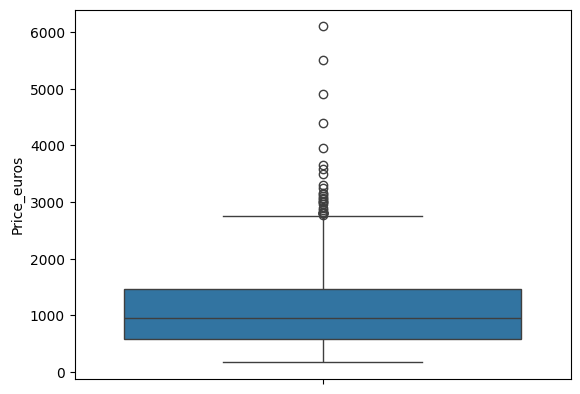

In [41]:
sns.boxplot(df_train['Price_euros'])

<Axes: xlabel='Price_euros', ylabel='Count'>

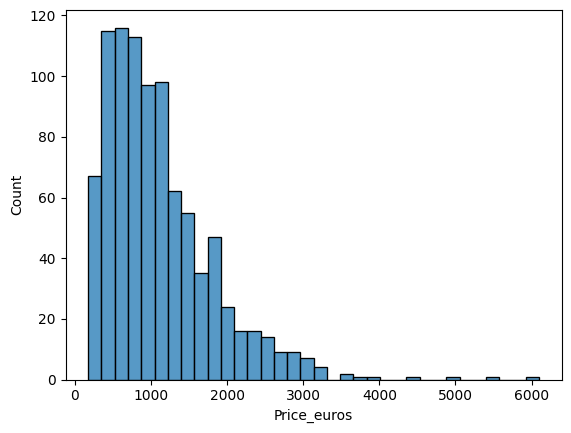

In [42]:
sns.histplot(df_train['Price_euros'])

# voy a normalizar esto

In [43]:
# vamos a normalizar el target

'''df_train['Price_euros'] = np.log10(df_train['Price_euros'])

sns.histplot(df_train['Price_euros'])'''

"df_train['Price_euros'] = np.log10(df_train['Price_euros'])\n\nsns.histplot(df_train['Price_euros'])"

In [44]:
# escalamos el data

scaler = StandardScaler()

no_escalar = df_train['Price_euros']
df_train = pd.DataFrame(scaler.fit_transform(df_train.drop(['Price_euros'], axis= 1)), columns= df_train.drop(['Price_euros'], axis= 1).columns, index= df_train.index)
df_train['Price_euros'] = no_escalar

# escalo el test

no_escalar = df_test['id']
df_test = pd.DataFrame(scaler.transform(df_test.drop(['id'], axis= 1)), columns= df_test.drop(['id'], axis= 1).columns, index= df_test.index)
df_test['id'] = no_escalar

In [45]:
'''limpiador = cleaner(data= df_train, data_test= df_test, target= 'Price_euros')'''

# estas celdas estaban en funcion del modulo que intente crear pero que me salio rana, las dejo porque si

"limpiador = cleaner(data= df_train, data_test= df_test, target= 'Price_euros')"

In [46]:
'''limpiador.clean_all()
train= limpiador.get_cleaned_train()'''

'limpiador.clean_all()\ntrain= limpiador.get_cleaned_train()'

In [47]:
df_train.describe()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,912.000000
mean,-9.154471e-17,-4.285071e-17,1.119962e-16,5.190780e-16,5.064175e-17,1.129701e-16,2.824252e-17,7.791039e-17,-2.064625e-16,-4.207161e-16,1.743245e-16,1108.122873
std,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,714.597741
min,-1.556354e+00,-1.755340e+00,-2.101919e+00,-3.480872e+00,-1.011988e+00,-2.705469e+00,-1.263717e+00,-1.979231e+00,-1.829683e+00,-4.461157e+00,-2.053966e+00,174.000000
25%,-5.911076e-01,-7.296940e-01,-4.787606e-01,-7.168146e-01,-1.011988e+00,-5.612027e-01,-8.553149e-01,-8.141758e-01,-2.524894e-01,1.897063e-01,-8.143370e-01,589.000000
50%,1.328272e-01,-1.165566e-01,3.328187e-01,4.171575e-01,1.273412e-02,4.134638e-01,-3.851156e-02,-3.747253e-02,-2.524894e-01,1.897063e-01,1.208215e-02,949.000000
75%,8.567621e-01,8.490878e-01,3.328187e-01,4.171575e-01,1.273412e-02,8.033304e-01,-3.851156e-02,8.686813e-01,1.324705e+00,1.897063e-01,4.099877e-01,1458.500000
max,2.787255e+00,1.799732e+00,1.955977e+00,2.401609e+00,3.428474e+00,2.557730e+00,4.862309e+00,2.551538e+00,1.324705e+00,2.980224e+00,3.929921e+00,6099.000000


In [48]:
train_set, validation_set = train_test_split(df_train, test_size= 0.2, random_state= 42)

In [49]:
x_train = train_set.drop(['Price_euros'], axis= 1)
y_train = train_set['Price_euros']

x_validation = validation_set.drop(['Price_euros'], axis= 1)
y_validation = validation_set['Price_euros']

<Axes: xlabel='Price_euros', ylabel='Count'>

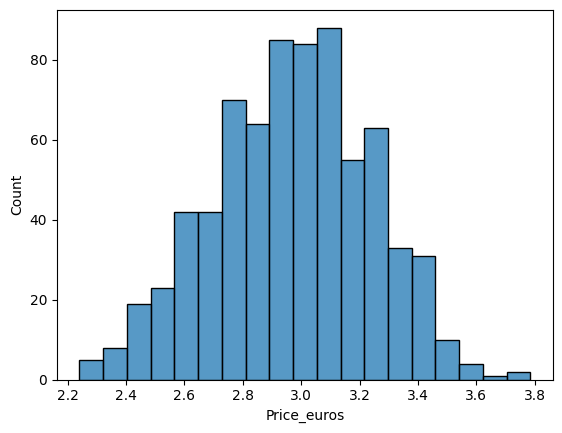

In [50]:
# quiero probar lo del log10 y tal

y_train = np.log10(y_train)
sns.histplot(y_train)

## random forest

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
forest = RandomForestRegressor(random_state= 42)

modelo_forest = forest.fit(x_train, y_train)

y_pred = modelo_forest.predict(x_validation)
y_pred = np.power(10, y_pred)

mean_absolute_error(y_validation, y_pred)

187.73393930268503

In [54]:
# pipeline

model = make_pipeline(
    TransformedTargetRegressor(
        regressor= Ridge(alpha= 1e-10), func= np.log10, inverse_func=  sp.special.exp10
    )
)

In [55]:
model.fit(x_train, y_train)
y_pred = model.predict(x_validation)

mean_absolute_error(y_validation, y_pred)

1049.739592298348

## gradient regressor

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

In [76]:
gradient_model = GradientBoostingRegressor(random_state= 42)

gradient_model.fit(x_train, y_train)

y_pred = gradient_model.predict(x_validation)
y_pred = np.power(10, y_pred)

mean_absolute_error(y_validation, y_pred)

167.41367499016644

## linear regression

In [58]:
from sklearn.linear_model import LinearRegression

In [77]:
lineal_model = LinearRegression()

lineal_model.fit(x_train, y_train)
y_pred = lineal_model.predict(x_validation)
y_pred = np.power(10, y_pred)

mean_absolute_error(y_validation, y_pred)

277.2702153740178

In [60]:
df_test

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,id
0,-0.108484,-0.307810,1.144398,-1.212927,3.086900,0.803330,1.595095,0.480330,-0.252489,-0.740466,-1.120418,181
1,-1.556354,-1.567836,0.332819,0.417157,-1.011988,0.803330,-0.038512,-0.684725,-1.829683,-0.740466,0.256947,708
2,-1.556354,-1.500335,0.332819,0.417157,-1.011988,-0.561203,-0.855315,0.221429,-0.252489,-3.530984,0.563028,862
3,-0.108484,-1.410333,0.332819,-0.716815,0.012734,0.023597,-0.038512,-0.684725,-0.252489,1.119879,-0.921465,1064
4,-0.108484,-1.432833,0.332819,-1.212927,0.012734,0.413464,-0.038512,-0.684725,-0.252489,-0.740466,-1.059202,702
...,...,...,...,...,...,...,...,...,...,...,...,...
386,0.615450,-0.742819,-1.290340,0.417157,0.012734,0.998264,-0.038512,-0.684725,1.324705,-1.670639,0.563028,1281
387,0.615450,-0.997824,-1.290340,0.417157,0.012734,0.608397,1.595095,0.480330,1.324705,-0.740466,1.955698,524
388,-0.108484,-1.627837,0.332819,0.417157,-1.011988,0.413464,-0.855315,0.221429,-0.252489,-1.670639,-0.110350,1015
389,-0.108484,-1.650338,0.332819,0.417157,0.012734,-1.535869,-0.855315,0.221429,-1.829683,-0.740466,0.103907,1236


In [61]:
y_pred = lineal_model.predict(df_test.drop(['id'], axis= 1))
y_pred

array([3.38870553, 2.79118576, 2.53435288, 2.98221033, 2.94687475,
       2.97638256, 3.2258672 , 2.75586907, 4.27845309, 3.06032197,
       3.01022295, 2.67223027, 2.74958754, 2.79543554, 2.69337552,
       2.84611474, 2.84046903, 3.06080825, 2.96985052, 2.98289613,
       2.95784038, 2.90540724, 3.17353041, 2.85655271, 3.1513056 ,
       2.87101776, 2.97405471, 2.67242953, 2.96375483, 2.64096068,
       3.15081022, 2.94112757, 3.14476404, 2.66764713, 2.62027286,
       3.15469224, 2.71617346, 2.74844234, 3.52761141, 2.76054795,
       2.74812387, 2.86919814, 3.02363395, 3.10439605, 2.82532985,
       3.0310058 , 2.76394084, 3.57970218, 2.50212787, 3.14774639,
       2.98852978, 2.82197547, 2.89663539, 2.49246993, 2.94720498,
       2.75179665, 2.88660385, 2.6132018 , 2.95536729, 2.94966385,
       2.91389986, 2.96657497, 2.84874114, 2.82994669, 2.92748546,
       3.02256597, 2.74658128, 3.15270104, 2.61017909, 3.1442568 ,
       2.87785373, 3.19364447, 3.0198438 , 2.8321585 , 2.97467

In [62]:
pipe = Pipeline([('regressor', LinearRegression())])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_validation)

mean_absolute_error(y_validation, y_pred)

1049.7340011371568

## xgboost

In [63]:
import xgboost

In [78]:
xgboost_model = xgboost.XGBRegressor()

xgboost_model.fit(x_train, y_train)

y_pred = xgboost_model.predict(x_validation)
y_pred = np.power(10, y_pred)

mean_absolute_error(y_validation, y_pred)

183.04549742985296

## catboost

In [65]:
from catboost import CatBoostRegressor

In [79]:
catboost_model = CatBoostRegressor(random_state= 42)

catboost_model.fit(x_train, y_train, verbose= 0)

y_pred = catboost_model.predict(x_validation)
y_pred = np.power(10, y_pred)

mean_absolute_error(y_validation, y_pred)

159.3155424283438

In [69]:
x_test = df_test.drop(['id'], axis= 1)

y_pred = catboost_model.predict(x_test)
y_pred = np.power(10, y_pred)
y_pred

array([1422.66695766,  561.84217101,  324.64031675,  933.06620603,
        728.65283281, 1156.03917226, 1904.44791589,  571.14733007,
       1734.71465326, 1214.49726501, 1119.39106061,  385.57620465,
        413.28011776,  593.57019842,  508.32132971, 1173.09871976,
        630.52981162, 1127.85877159, 1044.32044954, 1255.19835909,
       1160.39145418,  937.30641829, 1212.08279598, 1075.00590537,
       1406.99955653,  535.04517917,  728.86975405,  385.57620465,
       1016.59190254,  487.90955237,  896.12559028,  892.14722918,
       1646.48301211,  545.10804623,  489.0049655 , 1396.57505923,
        676.50743974,  506.56291093, 2521.67033486,  531.86006322,
        471.89430533,  708.59642471, 1150.92419363, 1579.4443751 ,
        783.70045241, 1934.96892751,  585.69158145, 2038.25344198,
        324.54873845,  945.81821912,  751.56268403,  750.12872878,
        682.64850863,  353.42964315,  795.43147079,  519.37997706,
        715.02665426,  320.87018349,  904.05795814,  836.10062

In [70]:
df_test['Price_euros'] = y_pred

submision = df_test[['id', 'Price_euros']]

In [71]:
submision # esto da 302 en kaggle

,id,Price_euros
0,181,1422.666958
1,708,561.842171
2,862,324.640317
3,1064,933.066206
4,702,728.652833
...,...,...
386,1281,884.667801
387,524,1756.291411
388,1015,430.947481
389,1236,494.136719


In [72]:
submision.to_csv("submission.csv", index = False)

## lightgbm

In [73]:
import lightgbm as lgb

In [80]:
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_validation, label=y_validation, reference=train_data)

params = {
    'objective': 'regression',
    'metric': 'mae',
    'verbosity': -1
}

model = lgb.train(params, train_data, valid_sets=[test_data])

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(x_validation, num_iteration=model.best_iteration)
y_pred = np.power(10, y_pred)

mean_absolute_error(y_validation, y_pred)

157.8939603900435